In [24]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

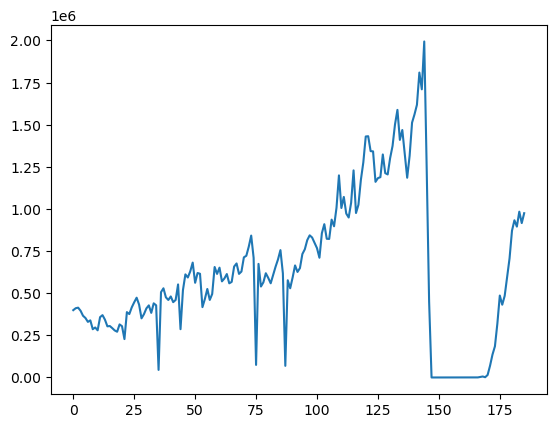

In [25]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + TRIPADVISORS INDEX + VISITOR ATTENTION INDEX + ECONOMIC INDEX - DATA COMPOSITION 1 (70-15-15).csv')
df1 = df.drop(['Class'], axis=1)
df1 = df1['Tourist Arrival']
df1 = np.array(df1).reshape(-1,1)
df1
plt.plot(df1)

In [26]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(df1)
df1.min()

0.0

In [27]:
train_size = 134
validation_size = 26
test_size = 26

In [28]:
train = df1[0:134, :]
train.shape

(134, 1)

In [29]:
validation = df1[134:160, :]
validation.shape

(26, 1)

In [30]:
test = df1[160:186, :]
test.shape

(26, 1)

In [31]:
def get_data(df1, look_back):
    dataX, dataY = [], []
    for i in range (len(df1)-look_back-1):
        a = df1[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(df1[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [32]:
look_back = 1
x_train, y_train = get_data(train, look_back)

In [33]:
x_test, y_test = get_data(test, look_back)

In [34]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [35]:
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(LSTM(24, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer =Adam(learning_rate=0.0005))
history = model.fit(x_train, y_train, epochs=50, batch_size=1)
model.summary()

Epoch 1/50
132/132 [==============================] - 16s 8ms/step - loss: 0.0630
Epoch 2/50
132/132 [==============================] - 1s 8ms/step - loss: 0.0181
Epoch 3/50
132/132 [==============================] - 1s 8ms/step - loss: 0.0136
Epoch 4/50
132/132 [==============================] - 1s 8ms/step - loss: 0.0124
Epoch 5/50
132/132 [==============================] - 1s 8ms/step - loss: 0.0113
Epoch 6/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0104
Epoch 7/50
132/132 [==============================] - 1s 8ms/step - loss: 0.0095
Epoch 8/50
132/132 [==============================] - 1s 9ms/step - loss: 0.0087
Epoch 9/50
132/132 [==============================] - 1s 7ms/step - loss: 0.0078
Epoch 10/50
132/132 [==============================] - 1s 7ms/step - loss: 0.0072
Epoch 11/50
132/132 [==============================] - 1s 7ms/step - loss: 0.0067
Epoch 12/50
132/132 [==============================] - 1s 7ms/step - loss: 0.0062
Epoch 13/50
132/132 [===

In [36]:
y_pred = model.predict(x_test)

1/1 [==============================] - 3s 3s/step


In [37]:
scaler.scale_

array([5.01473077e-07])

In [38]:
y_pred = scaler.inverse_transform(y_pred)

In [39]:
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)
y_test = scaler.inverse_transform(y_test)

In [40]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [41]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 92919.37186603122


In [42]:
MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 85444.79166666667


In [43]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 9.846667586454946e+19


In [44]:
def SMAPE(y_test,y_pred):
    return 100/len(y_test) * np.sum(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred)))
result = SMAPE(y_test,y_pred)
print("SMAPE :", result)

SMAPE : 89.52532590491222


In [45]:
def RMSPE(y_test, y_pred):
    return np.sqrt(np.nanmean(np.square(((y_test - y_pred) / y_test))))*100
result1 = RMSPE(y_test,y_pred)
print("RMSPE :", result1)

RMSPE : inf


/var/folders/w4/3f8pkphx2j78qktgvt5lpdvw0000gn/T/ipykernel_3174/2542154612.py:2: RuntimeWarning: divide by zero encountered in divide
  return np.sqrt(np.nanmean(np.square(((y_test - y_pred) / y_test))))*100


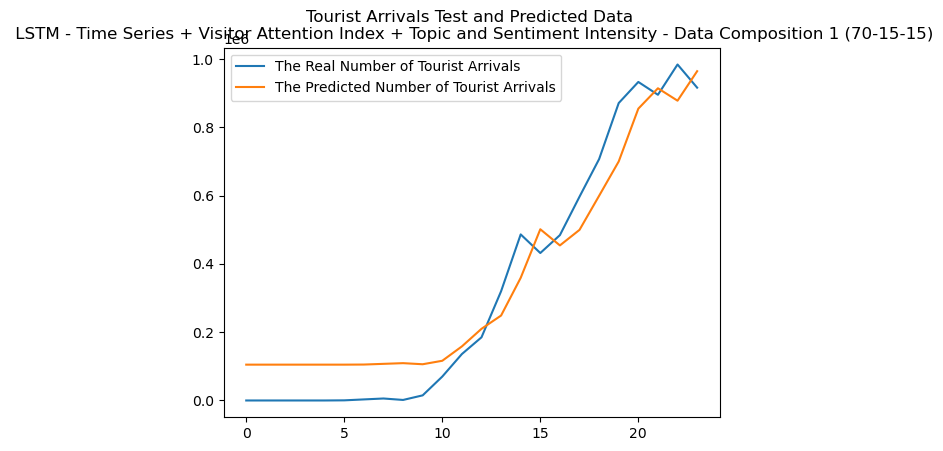

In [46]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n LSTM - Time Series + Visitor Attention Index + Topic and Sentiment Intensity - Data Composition 1 (70-15-15)")
plt.legend()
plt.show()